# Face Recognition and Classification using CNN


## Import Packages

In [1]:
import numpy as np                          # linear algebra
import os                                   # used for loading the data
from sklearn.metrics import confusion_matrix# confusion matrix to carry out error analysis
#import seaborn as sn                        # heatmap
from sklearn.utils import shuffle           # shuffle the data
import matplotlib.pyplot as plt             # 2D plotting library
import cv2                                  # image processing library
import tensorflow as tf                     # best library ever

In [2]:
# Here's our 6 categories that we have to classify.
class_names = ['Person1', 'Person2','Person3','Person4']
class_names_label = {'Person1': 0,
                    'Person2' : 1,
                    'Person3' : 2,
                     'Person4' :3
                    }
nb_classes = 4

## Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 10,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['C:/Users/Showkat/Desktop/Dataset/Train', 'C:/Users/Showkat/Desktop/Dataset/Validation']
    size = (224,224)
    output = []
    for dataset in datasets:
        directory = "" + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images, dtype = 'float32') ### Our images
        labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [5]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 1497
Number of testing examples: 160
Each image is of size: (224, 224, 3)


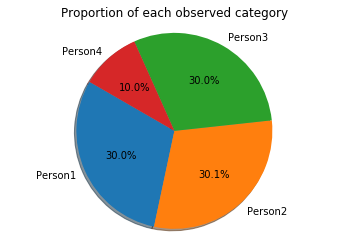

In [6]:
# Plot a pie chart
sizes = np.bincount(train_labels)
explode = (0, 0, 0,0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()

In [7]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

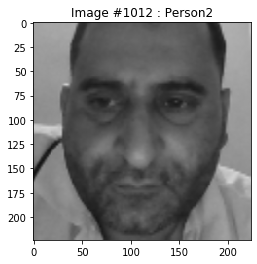

In [8]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

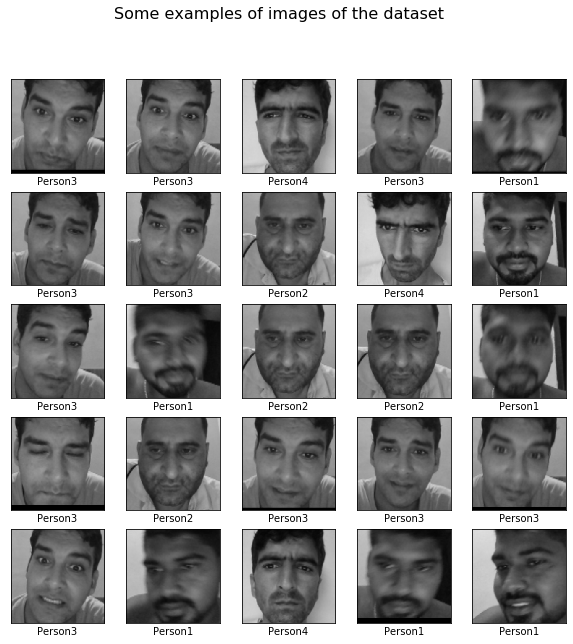

In [9]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Steps for Build the Model

Steps are:
1. Build the model,
2. Compile the model,
3. Train / fit the data to the model,
4. Evaluate the model on the testing set,
5. Carry out an error analysis of our model.

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
__________

In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=5, validation_split = 0.1)

Train on 1347 samples, validate on 150 samples
Epoch 1/5
1347/1347 [==============================] - 153s 113ms/sample - loss: 0.4503 - acc: 0.8426 - val_loss: 0.1975 - val_acc: 0.9333
Epoch 2/5
1347/1347 [==============================] - 151s 112ms/sample - loss: 0.0214 - acc: 0.9941 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 3/5
1347/1347 [==============================] - 151s 112ms/sample - loss: 0.0037 - acc: 0.9993 - val_loss: 0.0054 - val_acc: 0.9933
Epoch 4/5
1347/1347 [==============================] - 151s 112ms/sample - loss: 3.2664e-04 - acc: 1.0000 - val_loss: 1.8424e-04 - val_acc: 1.0000
Epoch 5/5
1347/1347 [==============================] - 151s 112ms/sample - loss: 8.1112e-05 - acc: 1.0000 - val_loss: 1.9916e-04 - val_acc: 1.0000


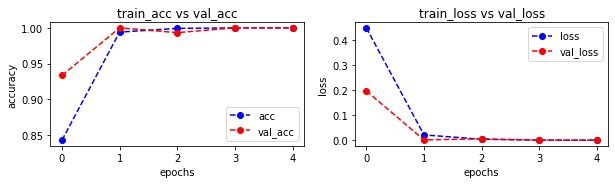

In [14]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['acc'],'bo--', label = "acc")
plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

In [15]:
test_loss = model.evaluate(test_images, test_labels)

160/160 [==============================] - 7s 44ms/sample - loss: 0.0985 - acc: 0.9812


In [16]:
print(test_loss)

[0.0985386960208416, 0.98125]


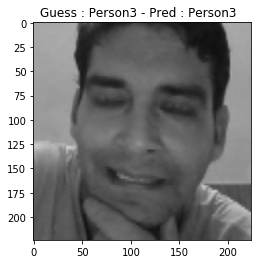

In [18]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} - Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

We can try to see on which kind of images the classifier has trouble.

In [19]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(6,6))
    fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
    for i in range(8):
        plt.subplot(4,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()

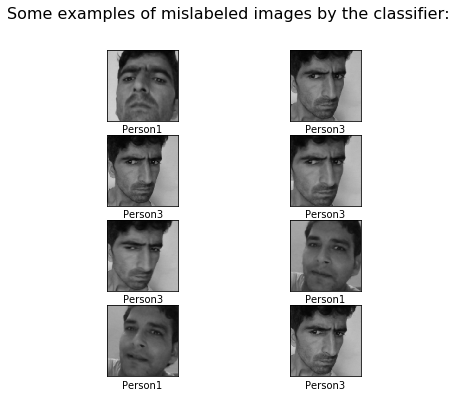

In [143]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[40  0  0  0]
 [ 0 40  0  0]
 [ 2  0 38  0]
 [ 1  0  5 34]]


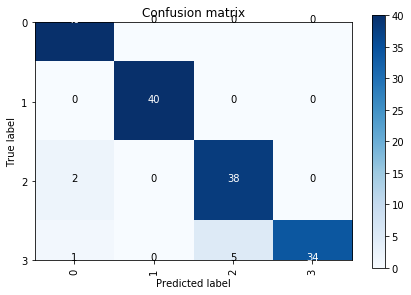

              precision    recall  f1-score   support

     Person1       0.93      1.00      0.96        40
     Person2       1.00      1.00      1.00        40
     Person3       0.88      0.95      0.92        40
     Person4       1.00      0.85      0.92        40

    accuracy                           0.95       160
   macro avg       0.95      0.95      0.95       160
weighted avg       0.95      0.95      0.95       160



In [145]:
import itertools
from sklearn.metrics import classification_report
cm = confusion_matrix(test_labels, pred_labels )
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=np.arange(4),
                      title='Confusion matrix')
plt.show()
print(classification_report(test_labels, pred_labels,target_names=['Person1', 'Person2','Person3','Person4']))